# Brain Tumor Segmentation
### EDA of survival data and name-mapping of the years 2018, 2019 and 2020

In [31]:
# load packages
import pandas as pd
import missingno as mso
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

When working with Colab, load the data from connected Google Drive. Otherwise make sure the data is downloaded from kaggle (https://www.kaggle.com/datasets/andrewmvd/brain-tumor-segmentation-in-mri-brats-2015/data) and load it from the data folder in this repo.

In [3]:
"""
# Colab
df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JEPSis/Tumor_Data/MICCAI_BraTS_2018_Data_Training/MICCAI_BraTS_2018_Data_Training/survival_data.csv')
df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JEPSis/Tumor_Data/MICCAI_BraTS_2019_Data_Training/MICCAI_BraTS_2019_Data_Training/survival_data_2019.csv')
df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JEPSis/Tumor_Data/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/survival_info_2020.csv')
names_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JEPSis/Tumor_Data/MICCAI_BraTS_2019_Data_Training/MICCAI_BraTS_2019_Data_Training/name_mapping.csv')
names_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JEPSis/Tumor_Data/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/name_mapping.csv')
"""
# Locally
df18 = pd.read_csv('data/survival_data_2018.csv')
df19 = pd.read_csv('data/survival_data_2019.csv')
df20 = pd.read_csv('data/survival_info_2020.csv')
names_2019 = pd.read_csv('data/name_mapping_2019.csv')
names_2020 = pd.read_csv('data/name_mapping_2020.csv')

To make some edits on this dataframe, they are copied for safety reasons.

In [6]:
df18.rename(columns={'BraTS18ID':'ID_2018'}, inplace = True)
df19.rename(columns={'BraTS19ID':'ID_2019'}, inplace = True)
df20.rename(columns={'Brats20ID':'ID_2020'},inplace = True)

In [4]:
# renaming
names19 = names_2019.copy()
names20 = names_2020.copy()

In [5]:
names19.rename(columns ={'BraTS_2017_subject_ID':'ID_2017', 'BraTS_2018_subject_ID':'ID_2018', 'BraTS_2019_subject_ID':'ID_2019'}, inplace = True)
names20.rename(columns ={'BraTS_2017_subject_ID':'ID_2017', 'BraTS_2018_subject_ID':'ID_2018', 'BraTS_2019_subject_ID':'ID_2019', 'BraTS_2020_subject_ID':'ID_2020'}, inplace = True)
names20.head()

,Grade,ID_2017,ID_2018,TCGA_TCIA_subject_ID,ID_2019,ID_2020
0,HGG,Brats17_CBICA_AAB_1,Brats18_CBICA_AAB_1,NaN,BraTS19_CBICA_AAB_1,BraTS20_Training_001
1,HGG,Brats17_CBICA_AAG_1,Brats18_CBICA_AAG_1,NaN,BraTS19_CBICA_AAG_1,BraTS20_Training_002
2,HGG,Brats17_CBICA_AAL_1,Brats18_CBICA_AAL_1,NaN,BraTS19_CBICA_AAL_1,BraTS20_Training_003
3,HGG,Brats17_CBICA_AAP_1,Brats18_CBICA_AAP_1,NaN,BraTS19_CBICA_AAP_1,BraTS20_Training_004
4,HGG,Brats17_CBICA_ABB_1,Brats18_CBICA_ABB_1,NaN,BraTS19_CBICA_ABB_1,BraTS20_Training_005


In [8]:
print(names19.shape, names20.shape, df18.shape, df19.shape, df20.shape)

(335, 5) (369, 6) (163, 4) (259, 4) (236, 4)


After printing the shapes, it becomes clear, that 335 and 369 patients are mapped in 2019 and 2020, respectively. But regarding the information of age, resection status and survival data, only for the half or two thirds data is provided.

**So let's check for missing values.**

<Axes: >

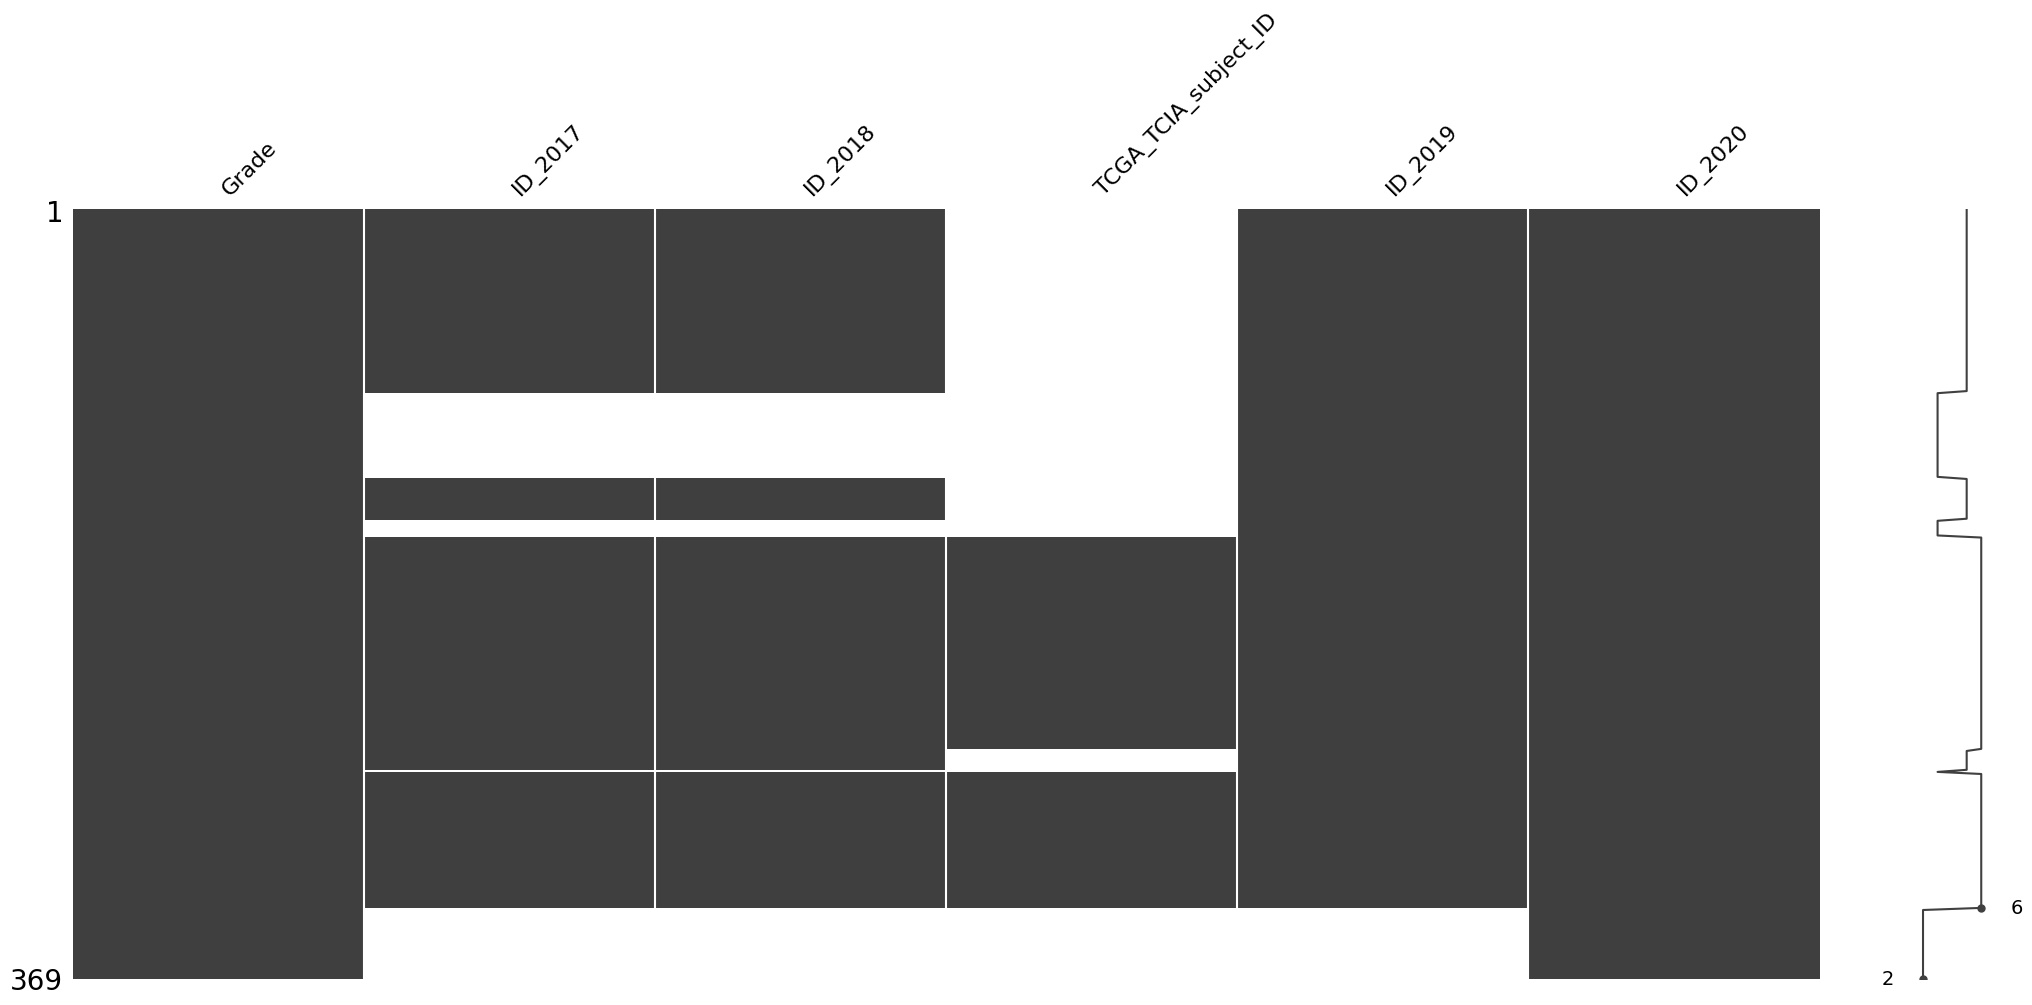

In [10]:
mso.matrix(names20)

In [66]:
print(f"""In 2019 {names19.ID_2017.isna().sum()} IDs are missing for 2017, 
      {names19.ID_2018.isna().sum()} IDs are missing for 2018 and 
      {names19.ID_2019.isna().sum()} are missing in 2019. 
      This means 50 patients have been newly diagnosed in 2019.""") 

print(f""" In 2020 the missing values for 2017 sum up to {names20.ID_2017.isna().sum()},
      for 2018 to {names20.ID_2018.isna().sum()}, 
      and for 2019 to {names20.ID_2019.isna().sum()}. 
      Consequently {names20.ID_2020.isna().sum()} are missing in 2020, 
      therefore 34 have been newly diagnosed.""")

In 2019 50 IDs are missing for 2017, 
      50 IDs are missing for 2018 and 
      0 are missing in 2019. 
      This means 50 patients have been newly diagnosed in 2019.
 In 2020 the missing values for 2017 sum up to 84,
      for 2018 to 84, 
      and for 2019 to 34. 
      Consequently 0 are missing in 2020, 
      therefore 34 have been newly diagnosed.


To check if there is a pattern in the missing values of the survival data, these tables are merged.

In [16]:
%run Merging.ipynb
df_full = pd.read_csv('data/df_full.csv')

<Axes: >

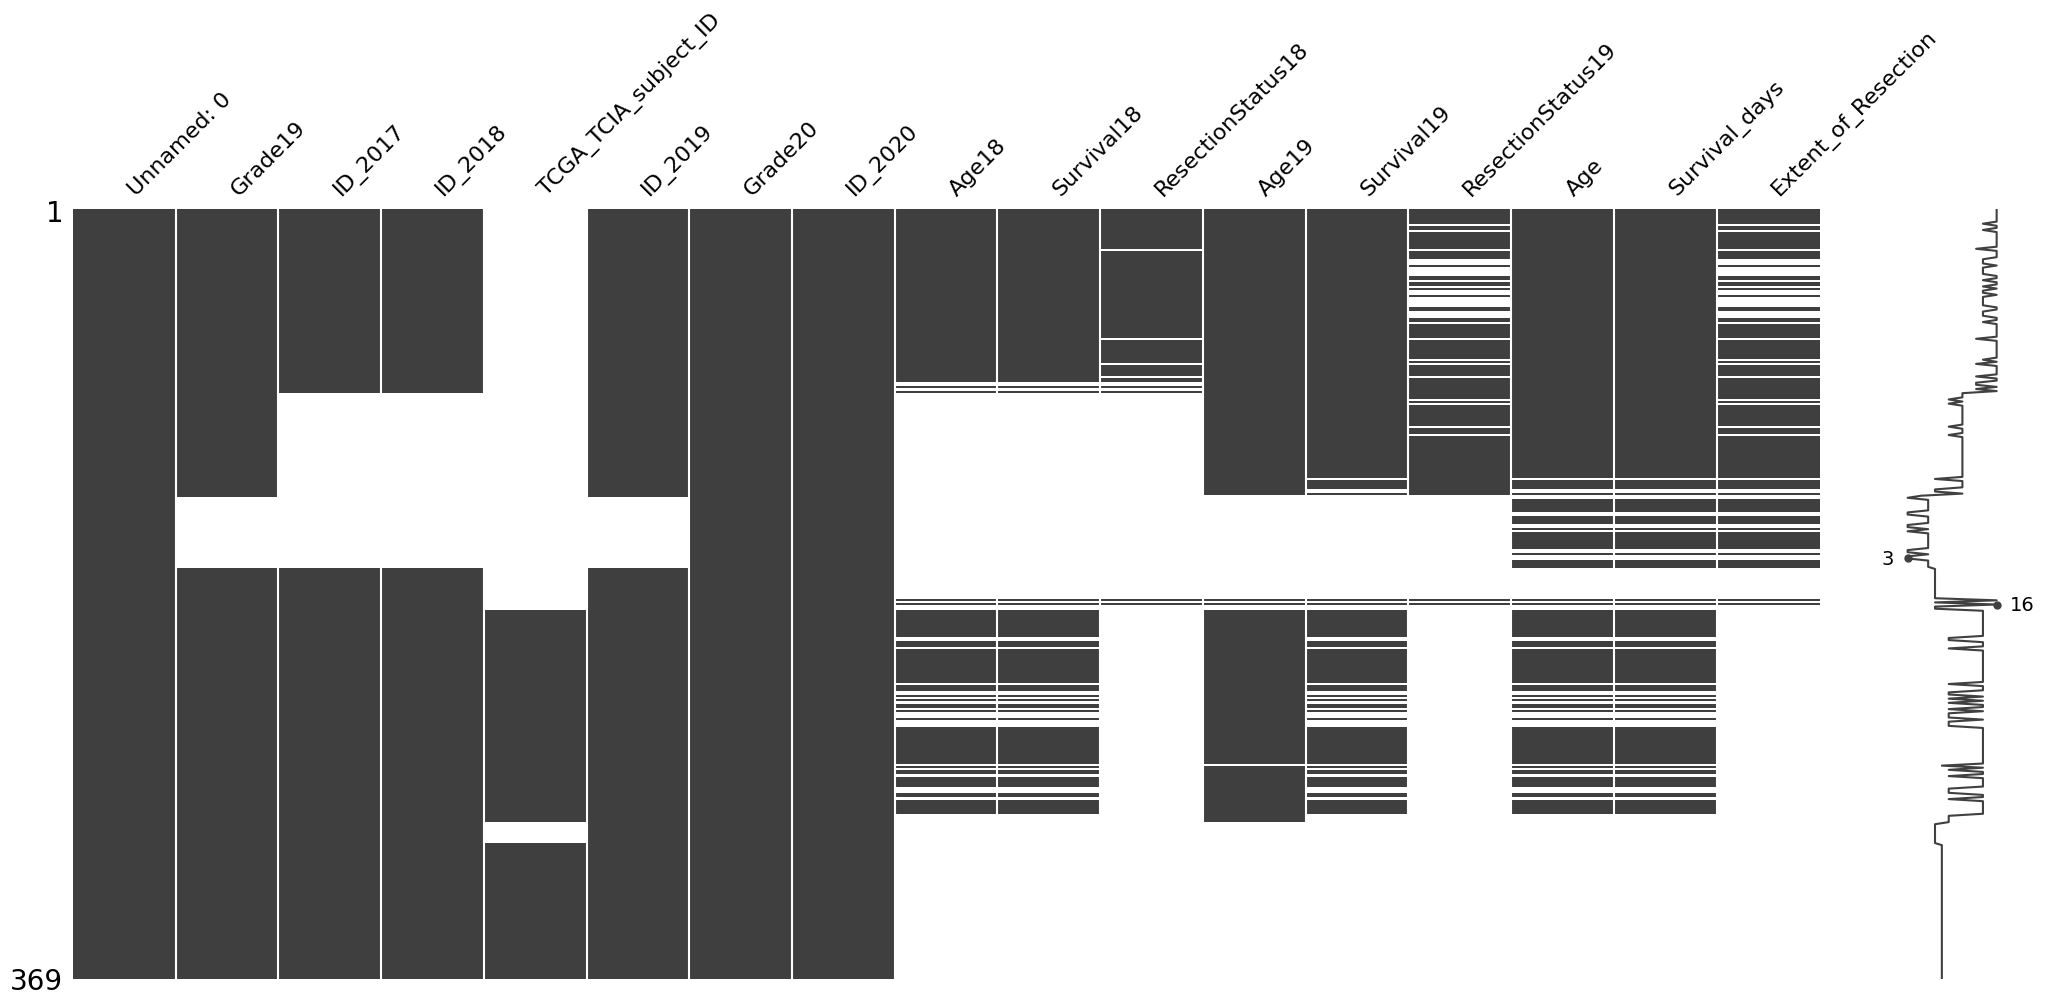

In [17]:
mso.matrix(df_full)

It is obvious that a lot survival data is missing. For the patients with indexes > 289 no information of age, survival data and reection status is provided.
Furthermore the column TCGA_TCIA_subject_ID is not given for the majority of patients and carries not much information.

In [18]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            369 non-null    int64  
 1   Grade19               335 non-null    object 
 2   ID_2017               285 non-null    object 
 3   ID_2018               285 non-null    object 
 4   TCGA_TCIA_subject_ID  167 non-null    object 
 5   ID_2019               335 non-null    object 
 6   Grade20               369 non-null    object 
 7   ID_2020               369 non-null    object 
 8   Age18                 163 non-null    float64
 9   Survival18            163 non-null    float64
 10  ResectionStatus18     83 non-null     object 
 11  Age19                 240 non-null    float64
 12  Survival19            212 non-null    object 
 13  ResectionStatus19     108 non-null    object 
 14  Age                   236 non-null    float64
 15  Survival_days         2

In [67]:
df_full.iloc[285:305,:]

,Unnamed: 0,Grade19,ID_2017,ID_2018,TCGA_TCIA_subject_ID,ID_2019,Grade20,ID_2020,Age18,Survival18,ResectionStatus18,Age19,Survival19,ResectionStatus19,Age,Survival_days,Extent_of_Resection
285,285,HGG,Brats17_TCIA_218_1,Brats18_TCIA08_218_1,TCGA-76-6280,BraTS19_TCIA08_218_1,HGG,BraTS20_Training_251,57.345,346.0,NaN,57.345205,346,NaN,57.345,346,NaN
286,286,HGG,Brats17_TCIA_469_1,Brats18_TCIA08_469_1,TCGA-76-6282,BraTS19_TCIA08_469_1,HGG,BraTS20_Training_252,63.899,519.0,NaN,63.898630,519,NaN,63.899,519,NaN
287,287,HGG,Brats17_TCIA_319_1,Brats18_TCIA08_319_1,TCGA-76-6285,BraTS19_TCIA08_319_1,HGG,BraTS20_Training_253,64.860,254.0,NaN,64.860274,254,NaN,64.860,254,NaN
288,288,HGG,Brats17_TCIA_242_1,Brats18_TCIA08_242_1,TCGA-76-6656,BraTS19_TCIA08_242_1,HGG,BraTS20_Training_254,66.479,147.0,NaN,66.479452,147,NaN,66.479,147,NaN
289,289,HGG,Brats17_TCIA_167_1,Brats18_TCIA08_167_1,TCGA-76-6657,BraTS19_TCIA08_167_1,HGG,BraTS20_Training_255,74.907,153.0,NaN,74.906849,153,NaN,74.907,153,NaN
290,290,HGG,Brats17_TCIA_205_1,Brats18_TCIA08_205_1,TCGA-76-6661,BraTS19_TCIA08_205_1,HGG,BraTS20_Training_256,NaN,NaN,NaN,54.698630,NaN,NaN,NaN,NaN,NaN
291,291,HGG,Brats17_TCIA_234_1,Brats18_TCIA08_234_1,TCGA-76-6662,BraTS19_TCIA08_234_1,HGG,BraTS20_Training_257,NaN,NaN,NaN,58.934247,NaN,NaN,NaN,NaN,NaN
292,292,HGG,Brats17_TCIA_436_1,Brats18_TCIA08_436_1,TCGA-76-6663,BraTS19_TCIA08_436_1,HGG,BraTS20_Training_258,NaN,NaN,NaN,44.180822,NaN,NaN,NaN,NaN,NaN
293,293,HGG,Brats17_TCIA_113_1,Brats18_TCIA08_113_1,TCGA-76-6664,BraTS19_TCIA08_113_1,HGG,BraTS20_Training_259,NaN,NaN,NaN,49.463014,NaN,NaN,NaN,NaN,NaN
294,294,LGG,Brats17_2013_0_1,Brats18_2013_0_1,NaN,BraTS19_2013_0_1,LGG,BraTS20_Training_260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Moreover it gets clear that the values for age, survival days do not get updated over the years, either the initial (2018) or the final (2020) value is taken for all years.

**Tumor Grade**

The brain tumors are classified in grades, here LGG (low-grade glioma) and HGG (high-grade-glioma). As the business goal of this project is to get a model for the classification of the tumor grade, the classes are checked for balance.

In [22]:
print(df_full.Grade19.value_counts(), df_full.Grade20.value_counts())

Grade19
HGG    259
LGG     76
Name: count, dtype: int64 Grade20
HGG    293
LGG     76
Name: count, dtype: int64


The only proper treatment of this cancer is a resection. In the following the spread between **Gross total resection (GTR) and subtotal resection (STR)** is shown.

<Axes: xlabel='Extent_of_Resection', ylabel='count'>

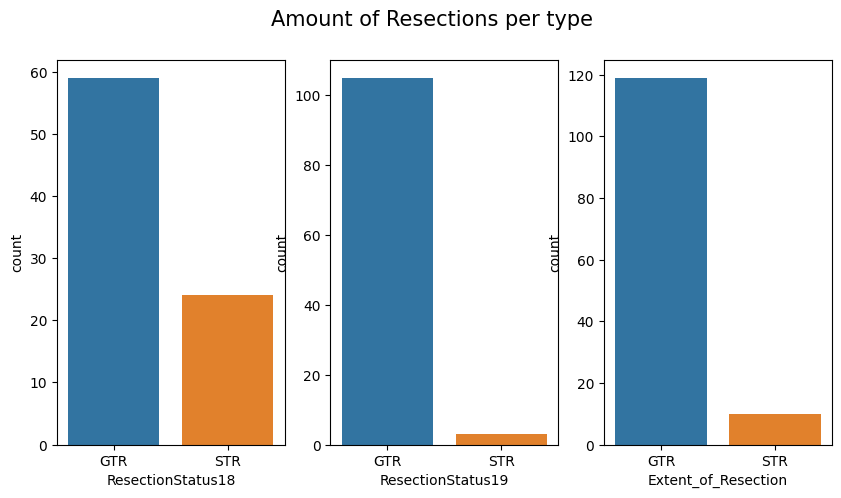

In [52]:
fig, axs = plt.subplots(1,3, figsize=(10,5))
plt.suptitle("Amount of Resections per type", fontsize = 15);
sns.countplot(df_full, x='ResectionStatus18', ax=axs[0])
sns.countplot(df_full, x='ResectionStatus19', ax=axs[1])
sns.countplot(df_full, x='Extent_of_Resection', ax=axs[2])

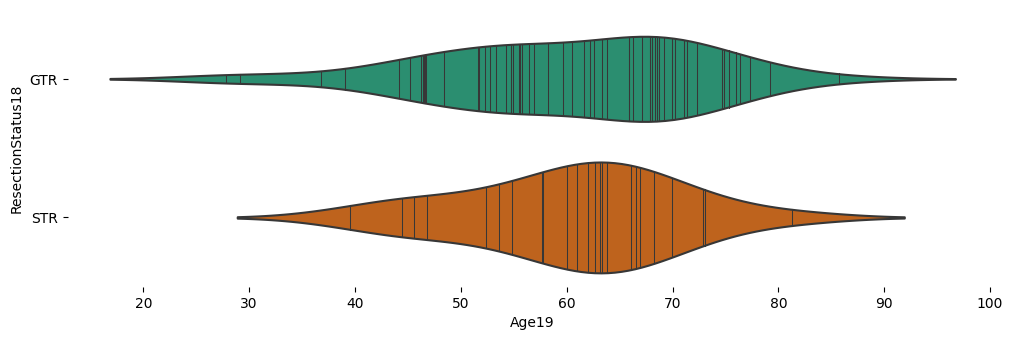

In [103]:
figsize = (12, 1.2 * len(df_full['ResectionStatus18'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_full, x='Age19', y='ResectionStatus18', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Overall more patients get a GTR and also over a higher variance of age. (Here Age19 is chosen as it has the least missing values.)

**Influence of resection on survival days**
On average the GTR gains a better success with more survival days, here depicted as outliers.
But as only a few patients get a  STR the plots are very biased towards this individual values.

To be able to plot the survival days, one person needs to be dropped as the value is a string 'ALIVE (1029 days later)'.

In [ ]:
df_full.query("Survival19 == 'ALIVE (301 days later)'").index

In [89]:
df_full.query("Survival19 == 'ALIVE (1029 days later)'").index

Index([84], dtype='int64')

In [90]:
df_full = df_full.drop(index = 84, axis =0)

In [98]:
# converting Survival into integer
df_full.Survival19 = df_full.Survival19.astype('float')
df_full.Survival_days = df_full.Survival_days.astype('float')

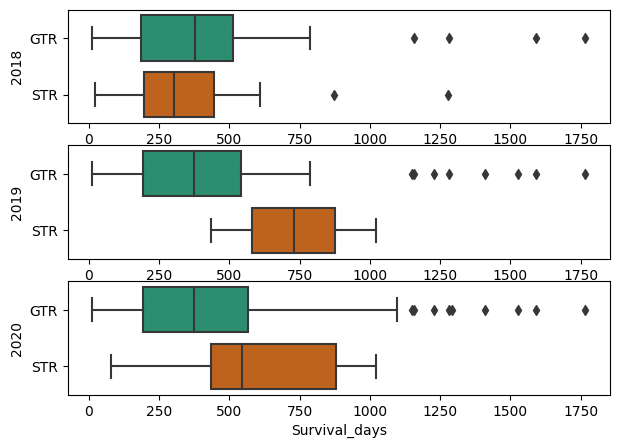

<Figure size 1200x360 with 0 Axes>

In [130]:
fig, axs = plt.subplots(3,1,figsize = (7, 5))
plt.figure(figsize=figsize)
fig1 = sns.boxplot(df_full, x='Survival18', y='ResectionStatus18', palette='Dark2', ax=axs[0])
fig1.set_ylabel('2018')
fig2 = sns.boxplot(df_full, x='Survival19', y='ResectionStatus19', palette='Dark2', ax = axs[1])
fig2.set_ylabel('2019')
fig3 = sns.boxplot(df_full, x='Survival_days', y='Extent_of_Resection', palette='Dark2', ax=axs[2])
fig3.set_ylabel('2020')
plt.tight_layout()
sns.despine(top=True, right=True, bottom=True, left=True);

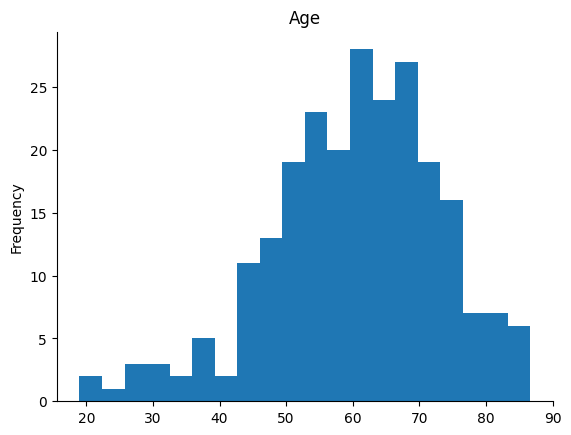

In [131]:
df_full['Age19'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='Frequency'>

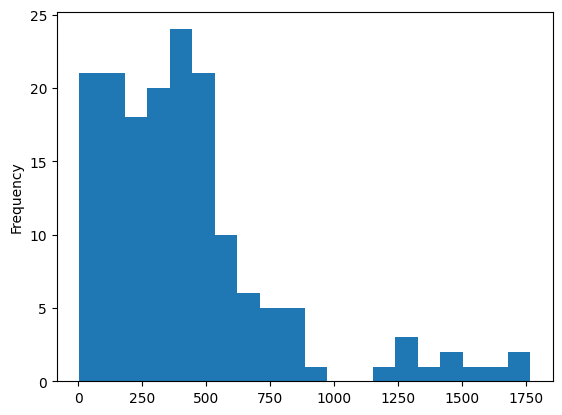

In [ ]:
df['Survival'].plot(kind='hist', bins = 20)

2019

In [130]:
survival3.query('Age.notnull()')

,Grade19,ID_2017,ID_2018,TCGA_TCIA_subject_ID,ID_2019,Grade20,ID_2020,Age18,Survival18,ResectionStatus18,Age19,Survival19,ResectionStatus19,Age,Survival_days,Extent_of_Resection
0,HGG,Brats17_CBICA_AAB_1,Brats18_CBICA_AAB_1,NaN,BraTS19_CBICA_AAB_1,HGG,BraTS20_Training_001,60.463,289.0,GTR,60.463014,289,GTR,60.463,289,GTR
1,HGG,Brats17_CBICA_AAG_1,Brats18_CBICA_AAG_1,NaN,BraTS19_CBICA_AAG_1,HGG,BraTS20_Training_002,52.263,616.0,GTR,52.263014,616,GTR,52.263,616,GTR
2,HGG,Brats17_CBICA_AAL_1,Brats18_CBICA_AAL_1,NaN,BraTS19_CBICA_AAL_1,HGG,BraTS20_Training_003,54.301,464.0,GTR,54.301370,464,GTR,54.301,464,GTR
3,HGG,Brats17_CBICA_AAP_1,Brats18_CBICA_AAP_1,NaN,BraTS19_CBICA_AAP_1,HGG,BraTS20_Training_004,39.068,788.0,GTR,39.068493,788,GTR,39.068,788,GTR
4,HGG,Brats17_CBICA_ABB_1,Brats18_CBICA_ABB_1,NaN,BraTS19_CBICA_ABB_1,HGG,BraTS20_Training_005,68.493,465.0,GTR,68.493151,465,GTR,68.493,465,GTR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,HGG,Brats17_TCIA_218_1,Brats18_TCIA08_218_1,TCGA-76-6280,BraTS19_TCIA08_218_1,HGG,BraTS20_Training_251,57.345,346.0,NaN,57.345205,346,NaN,57.345,346,NaN
286,HGG,Brats17_TCIA_469_1,Brats18_TCIA08_469_1,TCGA-76-6282,BraTS19_TCIA08_469_1,HGG,BraTS20_Training_252,63.899,519.0,NaN,63.898630,519,NaN,63.899,519,NaN
287,HGG,Brats17_TCIA_319_1,Brats18_TCIA08_319_1,TCGA-76-6285,BraTS19_TCIA08_319_1,HGG,BraTS20_Training_253,64.860,254.0,NaN,64.860274,254,NaN,64.860,254,NaN
288,HGG,Brats17_TCIA_242_1,Brats18_TCIA08_242_1,TCGA-76-6656,BraTS19_TCIA08_242_1,HGG,BraTS20_Training_254,66.479,147.0,NaN,66.479452,147,NaN,66.479,147,NaN
